
## **COMP700 Honours Project**
Author: Ricardo Bharat; 
        219014175 @ University of KwaZulu-Natal




The purpose of this notebook is to define and train a Convolutional Neural Network, also known as CNN or ConvNet to predict the current state of the image(No Pothole or Pothole).This model will be saved and used in the android application that is being develpoed in pycharm.

A Convolutional Neural Network is a class of neural networks that specializes in processing data that has a grid-like topology, such as an image. A digital image is a binary representation of visual data.

i.Imports.

In [ ]:
#The first step is to import modules that will be used to train the model and read/process the images for the model
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
import glob 
from google.colab.patches import cv2_imshow
import imgaug.augmenters as iaa
import random

ii.Mount Drive

In [ ]:
from importlib_metadata import version
print(version('tensorflow'))

2.9.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


iii.Load Training Data from Google Drive.

In [ ]:
class_names = ['No Pothole','Pothole']
size=250

In [ ]:
datasetPath="/content/drive/MyDrive/Comp700RicardoBharat/Dataset 2.0"

In [ ]:
potholeImages_path = glob.glob(datasetPath + "/Potholes/*.jpg")
potholeImages_path.extend(glob.glob(datasetPath +"/Potholes/*.jpeg"))
potholeImages_path.extend(glob.glob(datasetPath +"/Potholes/*.png"))
potholeImages_path.extend(glob.glob(datasetPath + "/Plain/*.jpg"))

In [ ]:
pothole_images=[]
pothole_labels=[]
non_pothole_images=[]
non_pothole_labels=[]
c=0
for i in potholeImages_path:
  img = cv.imread(i)
  c= c+1
  try:
      img = cv.resize(img, (size,size),interpolation=cv.INTER_AREA) 
      if c <=986:
            pothole_images.append(img)
            pothole_labels.append([1])
      else:
            non_pothole_images.append(img)
            non_pothole_labels.append([0])
  except:
    print(c)

585
780


v.Image Augmentation to Increase Dataset Size and Qaulity 

In [ ]:
def rotateImages(oImages,angle):
  augmentation = iaa.Sequential(
    [
        iaa.Rotate((angle))
        ]
    )
  augmented_images = augmentation(images = oImages)

  return augmented_images

In [ ]:
def flipImages(oImages):
  augmentation = iaa.Sequential(
    [iaa.Fliplr(1) #Horizontal Flip
        ]
    )
  augmented_images = augmentation(images = oImages)

  return augmented_images

In [ ]:
temp_images = non_pothole_images
rotated_images=[] 
rotated_images=rotateImages(temp_images,180)
for i in range(len(rotated_images)):
  non_pothole_images.append(rotated_images[i])
  non_pothole_labels.append(non_pothole_labels[i])

rotated_images=[] 

flipped_images = flipImages(temp_images)
for i in range(len(flipped_images)):
  non_pothole_images.append(flipped_images[i])
  non_pothole_labels.append(non_pothole_labels[i])

flipped_images=[]
temp_images = []

In [ ]:
temp_images = pothole_images
rotated_images=[] 
rotated_images=rotateImages(temp_images,180)
for i in range(len(rotated_images)):
  pothole_images.append(rotated_images[i])
  pothole_labels.append(pothole_labels[i])

rotated_images=[] 

temp_images = []

In [ ]:
print("Non Pothole Images:",len(non_pothole_images))
print("Pothole Images:",len(pothole_images))

Non Pothole Images: 1044
Pothole Images: 1968


In [ ]:
random.shuffle(non_pothole_images)
random.shuffle(pothole_images)

In [ ]:
num1=int(len(non_pothole_images)*0.85)
num2=int(len(pothole_images)*0.85)

In [ ]:
train_images=pothole_images[:num2]
train_labels=pothole_labels[:num2]
test_images=pothole_images[num2:]
test_labels=pothole_labels[num2:]
train_images+=non_pothole_images[:num1]
train_labels+=non_pothole_labels[:num1]
test_images+=non_pothole_images[num1:]
test_labels+=non_pothole_labels[num1:]

In [ ]:
train_images = np.asarray(train_images)
train_labels = np.asarray(train_labels)
test_images = np.asarray(test_images)
test_labels = np.asarray(test_labels)

In [ ]:
train_images,test_images = train_images /255, test_images /255

vi. Define and Train Model

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(16,(8,8),activation='relu', input_shape=(size,size,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(16,(4,4),activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(32,(8,8),activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64,(4,4),activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64,(2,2),activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(2,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 243, 243, 16)      3088      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 121, 121, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 118, 118, 16)      4112      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 59, 59, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 32)        32800     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 32)       0

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=25, validation_data=(test_images,test_labels))

Epoch 1/25
80/80 [==============================] - 11s 62ms/step - loss: 0.6296 - accuracy: 0.6596 - val_loss: 0.5635 - val_accuracy: 0.7152
Epoch 2/25
80/80 [==============================] - 4s 50ms/step - loss: 0.4914 - accuracy: 0.7687 - val_loss: 0.4147 - val_accuracy: 0.8146
Epoch 3/25
80/80 [==============================] - 4s 50ms/step - loss: 0.3536 - accuracy: 0.8519 - val_loss: 0.3250 - val_accuracy: 0.8543
Epoch 4/25
80/80 [==============================] - 4s 50ms/step - loss: 0.3212 - accuracy: 0.8617 - val_loss: 0.2651 - val_accuracy: 0.8874
Epoch 5/25
80/80 [==============================] - 4s 50ms/step - loss: 0.2166 - accuracy: 0.9113 - val_loss: 0.2306 - val_accuracy: 0.9205
Epoch 6/25
80/80 [==============================] - 5s 59ms/step - loss: 0.1837 - accuracy: 0.9343 - val_loss: 0.1767 - val_accuracy: 0.9382
Epoch 7/25
80/80 [==============================] - 4s 50ms/step - loss: 0.1222 - accuracy: 0.9508 - val_loss: 0.1950 - val_accuracy: 0.9205
Epoch 8/25
8

vii.Test Accuracy

In [ ]:
loss, accuracy = model.evaluate(test_images,test_labels)
print(f"Loss:{loss}")
print(f"Accuracy:{accuracy}")

15/15 [==============================] - 0s 23ms/step - loss: 0.4450 - accuracy: 0.9272
Loss:0.44500792026519775
Accuracy:0.9271523356437683


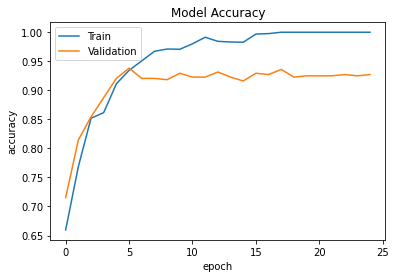

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

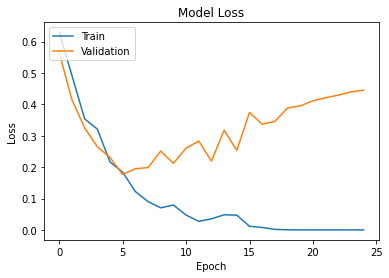

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

viii.Make Prediction

1/1 [==============================] - 0s 144ms/step
Prediction is Pothole


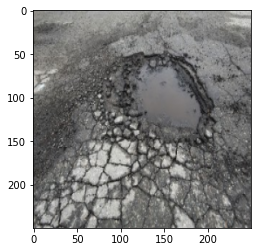

In [ ]:
img = cv.imread('/content/drive/MyDrive/Comp700RicardoBharat/Dataset 2.0/Potholes/120.jpg')
img= cv.cvtColor(img,cv.COLOR_BGR2RGB)
img = cv.resize(img, (size,size),interpolation=cv.INTER_AREA)
plt.imshow(img,cmap=plt.cm.binary)

prediction = model.predict(np.array([img])/255)
index = np.argmax(prediction)
print(f'Prediction is {class_names[index]}')

ix.Save Model

In [ ]:
model.save('pothole_classifier_final.model')
#model = models.load_model('pothole_classifier.model')